In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams['font.sans-serif'] = ['SimHei']  
plt.rcParams['axes.unicode_minus'] = False 

# 示例使用
file_path = 'watermalon.csv'
df = pd.read_csv(file_path)

In [2]:
#查看数据
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   色泽      17 non-null     object 
 1   根蒂      17 non-null     object 
 2   敲声      17 non-null     object 
 3   纹理      17 non-null     object 
 4   脐部      17 non-null     object 
 5   触感      17 non-null     object 
 6   密度      17 non-null     float64
 7   含糖率     17 non-null     float64
 8   好瓜      17 non-null     object 
dtypes: float64(2), object(7)
memory usage: 1.3+ KB
None


In [3]:
#查看数据集描述的信息(非空值的数量,平均值,方差,最小值,下四分位数,中位数,上四分位数,最大值)
print(df.describe())

              密度        含糖率
count  17.000000  17.000000
mean    0.532647   0.212824
std     0.166906   0.119879
min     0.243000   0.042000
25%     0.403000   0.103000
50%     0.593000   0.211000
75%     0.657000   0.267000
max     0.774000   0.460000


In [4]:
# 检查整个 DataFrame 是否有缺失值,如果有则检查每列有多少缺失值
if df.isnull().any().any():
    print(df.isnull().sum())
else:
    print("无异常")

无异常


In [5]:
class LogisticModel:
    def __init__(self, X, Y, alpha=0.05, mini=0.00001) -> None:
        self.x = X
        self.y = Y
        self.alpha = alpha  # 学习率
        self.mini = mini  # 迭代停止最小误差
        self.theta = np.zeros(len(self.x[0]) + 1)  # 初始化theta，包括偏置项
        self.predict = []  # 存放预测值

    #构建sigmoid函数
    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))
        
    # 计算损失值
    def loss(self, theta):
        sum = 0.0
        for i in range(len(self.y)):
            if self.y[i][0] == 1:
                sum += -np.log(self.sigmoid(np.dot(np.append(1, self.x[i]), theta)))
            else:
                sum += -np.log(1 - self.sigmoid(np.dot(np.append(1, self.x[i]), theta)))
        return sum / len(self.y)

    # 求取梯度
    def gradient(self, theta):
        sum = 0
        for i in range(len(self.y)):
            sum += (self.sigmoid(np.dot(np.append(1, self.x[i]), theta)) - self.y[i][0]) * np.append(1, self.x[i])
        sum /= len(self.y)
        return self.alpha * sum

    # 检查是否达到迭代边界条件
    def check(self, old_loss):
        TempNew = self.loss(self.theta)
        self.theta -= self.gradient(self.theta)  # 更新theta
        result = abs(TempNew - old_loss)
        if result <= self.mini: #检查是否收敛
            return False
        return True

    # 迭代梯度下降的过程
    def fit(self):
        old_loss = self.loss(self.theta)
        while self.check(old_loss):
            old_loss = self.loss(self.theta)

    # 模型预测
    def predictSelf(self):
        for i in range(len(self.y)):
            if self.sigmoid(np.dot(np.append(1, self.x[i]), self.theta)) > 0.5:
                self.predict.append(1)
            else:
                self.predict.append(0)

    # 计算准确率
    def accuracy(self):
        y_true = self.y.flatten()
        y_pred = np.array(self.predict)
        correct_predictions = np.sum(y_true == y_pred)
        total_predictions = len(y_true)
        return correct_predictions / total_predictions

    #展示图像
    def show(self):
        # 将预测结果和真实标签转换为一维数组
        y_true = self.y.flatten()
        y_pred = np.array(self.predict)
        
        plt.figure(figsize=(10, 6))
        plt.scatter(range(len(y_true)), y_true, label='真实标签', marker='o', color='blue')
        plt.scatter(range(len(y_pred)), y_pred, label='预测标签', marker='x', color='red')
        plt.title('预测结果与真实标签对比')
        plt.xlabel('样本索引')
        plt.ylabel('标签')
        plt.xticks(range(len(y_true)))
        plt.legend()
        plt.grid(True)
        plt.show()

In [6]:
#归一化
def min_max_scaler(X):
    return (X - np.min(X, axis=0)) / (np.max(X, axis=0) - np.min(X, axis=0))

模型的准确率为: 0.71


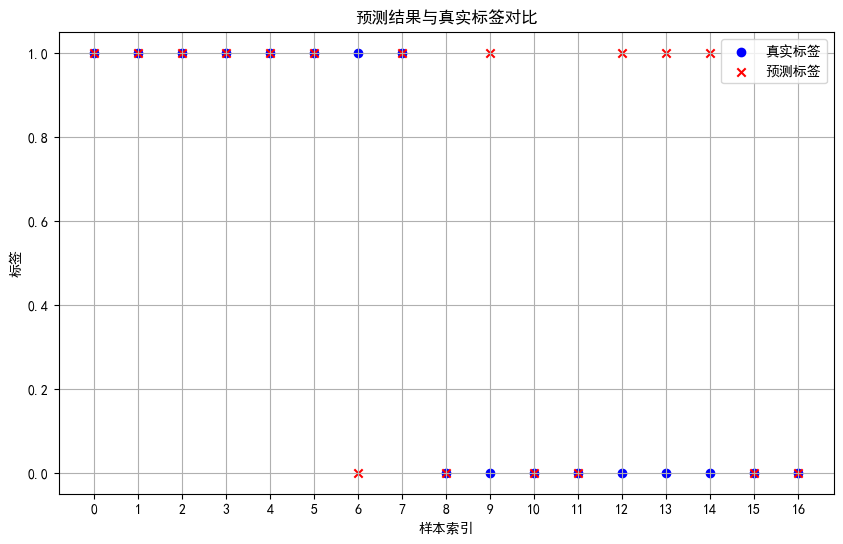

In [7]:
density = df['密度'].values.reshape(-1, 1)
sugar_rate = df['含糖率'].values.reshape(-1, 1)
#拼接2个数组
x = np.hstack((density, sugar_rate))
x_scaled = min_max_scaler(x)
y = np.array([1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
              0, 0, 0, 0, 0, 0]).reshape(-1, 1)

Test = LogisticModel(x_scaled, y)
Test.fit()
Test.predictSelf()
accuracy = Test.accuracy()  
print(f"模型的准确率为: {accuracy:.2f}")
Test.show()